**NumPy** (Numerical Python的简称)是高性能科学计算和数据分析的基础包，其部分功能如下：

1.**ndarray**---具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。

2.用于对整组数据进行快速运算的标准数学函数（无需编写循环）。

3.用于读写磁盘数据的工具以及用于操作内存映射文件的工具。

4.线性代数、随机数生成以及傅里叶变换功能。

5.用于集成由C、C++、Fortran等语言编写的代码的工具。

# NumPy的ndarray：一种多维数组对象

NumPy最重要的一个特点就是其N维数组对象(ndarray)，该对象是一个快速而灵活的大数据集容器，可以对**整块数据**执行一些数学运算，其语法**跟标量元素之间的元素一样**：

In [2]:
import numpy as np

In [3]:
data = np.random.rand(2,3)
data

array([[ 0.66823449,  0.74891337,  0.89877088],
       [ 0.57808306,  0.64496312,  0.43501228]])

In [4]:
data*10

array([[ 6.68234494,  7.48913372,  8.98770876],
       [ 5.78083064,  6.44963115,  4.3501228 ]])

In [5]:
data + 10

array([[ 10.66823449,  10.74891337,  10.89877088],
       [ 10.57808306,  10.64496312,  10.43501228]])

ndarray的数组运算与标量相乘、相加都是整体运算。

ndarray是一个通用的同构数据多维容器，其中所有元素必须是**相同类型**的。每个数组都有一个shape(表示各维度大小的元组)和一个dtype（用于说明数组数据类型的对象）：

In [6]:
data.shape

(2, 3)

In [7]:
data.dtype

dtype('float64')

# 创建ndarray

## array函数

创建数组最简单的方法就是使用array函数，它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组：

In [8]:
data1 = [6,5,8,0,3]

In [9]:
arr1 = np.array(data1)

In [10]:
arr1

array([6, 5, 8, 0, 3])

嵌套序列（比如由一组等长列表组成的列表）将会被转为一个多维数组：

In [11]:
data2 = [[1,2,3,4,],[5,6,7,8]]

In [12]:
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.shape

(2, 4)

## zeros、ones、empty、eye函数

除了np.array之外，还有一些函数也可以新建数组，如zeros和ones可以创建指定维度全为0和全为1的数组，empty可以创建一个没有任何具体数值的数组：

In [14]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
np.zeros((3,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [16]:
np.empty((2,3,2))

array([[[  1.12986739e-311,   3.16202013e-322],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   2.11142091e-052]],

       [[  1.59888808e+160,   1.68757401e-051],
        [  6.81465292e-038,   4.75259765e+174],
        [  4.19873610e+175,   1.79706535e-052]]])

empty并不是返回全0数组，很多情况下是返回一些未初始化的垃圾值。

In [17]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

eye函数创建一个正方形的N×N单位矩阵（对角线为1，其余为0）

## arange函数 

arange是Python内置函数range的数组版：

In [18]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# ndarray的数据类型

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [19]:
arr1 = np.array([1,2,3],dtype=np.float64)
arr2 = np.array([1,2,3],dtype=np.int32)

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

可以通过ndarray的**astype方法**显示地转换器dtype：

In [22]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [23]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

上例是整数被转换成浮点数，如果浮点数转换为整数，则小数会被截断：

In [24]:
arr = np .array([1.2,3.4,5.6,7.8])
arr

array([ 1.2,  3.4,  5.6,  7.8])

In [25]:
arr.astype(np.int32)

array([1, 3, 5, 7])

In [26]:
arr

array([ 1.2,  3.4,  5.6,  7.8])

注意，调用astype**会创建一个新的数组**（原始数据的一份拷贝）

# 数组和标量之间的运算

数组很重要，他使你不用编写循环即可对数据执行批量运算，这叫做矢量化(vectorization)。大小相等的数组之间的任何算术运算都会被应用到元素级：

In [27]:
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
arr*arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [29]:
arr-arr

array([[0, 0, 0],
       [0, 0, 0]])

同样，数组与标量的算术运算也会将那个标量值传播到各个元素：

In [30]:
1/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [31]:
arr**0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

不同大小的数组之间的运算叫做广播。

# 索引和切片

## 一维数组

一维数组很简单，表面看跟Python列表的功能差不多：

In [32]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
arr[5]

5

In [34]:
arr[5:8]

array([5, 6, 7])

In [35]:
arr[5:8]=12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

将一个标量赋值给一个切片时，该值会自动传播到整个选区。跟列表最重要的区别是，数组切片会修改原数据。其原因是，Numpy的设计目的是处理大数据，如果Numpy坚持要将数据复制来复制去的话会产生很大的性能和内存问题。

如果需要得到ndarray切片的而一份副本而非原视图，需要显示进行复制操作，如arr[5:8].copy()。

## 高维数组

对于高维数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [36]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [37]:
arr2d[2]

array([7, 8, 9])

索引[2]表示第3行

In [38]:
arr2d[0][2]

3

下图说明了二维数组的索引方式：

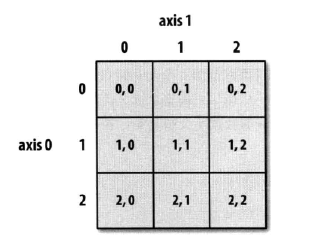

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray。

In [39]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [40]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0]是一个2×3的数组：

In [41]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

## 切片索引

naarry的切片语法跟Python列表这样的一维对象差不多：

In [42]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

高维度对象花样更多，可以在一个或多个轴上进行切片，也可以跟整数索引混合使用：

In [43]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

也可以一次传入多个切片或者整数索引和切片混合：

In [45]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [46]:
arr2d[1,:2]

array([4, 5])

注意，冒号表示选取整个轴，因此可以像下面这样只对高维度进行切片：

In [47]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

## 布尔型索引

假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。

In [48]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [49]:
data = np.random.randn(7,4)

In [50]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [51]:
data

array([[ 0.72121131, -0.74022964, -1.36949351, -1.46709241],
       [ 1.79304683, -1.17368823,  0.13437513,  2.18078242],
       [ 0.42122152,  0.39568948,  0.27142274,  0.75163365],
       [ 1.71427371, -0.04804993,  1.08059358, -1.11834681],
       [-0.17057898, -1.5141537 ,  1.26928857, -0.06892511],
       [-0.63019605, -0.02287002, -0.47373219,  0.45583315],
       [-0.87518245, -1.60224362,  0.02591182,  0.55019445]])

假设每个名字对应data数组的一行，而我们要选出对应于名字'Bob'的所有行，可以如下操作：

In [52]:
names =='Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [53]:
data[names =='Bob']

array([[ 0.72121131, -0.74022964, -1.36949351, -1.46709241],
       [ 1.71427371, -0.04804993,  1.08059358, -1.11834681]])

布尔型数组的长度必须跟被索引的轴长度一致。此外，还可以将布尔型数组跟整数混合使用：

In [54]:
data[names =='Bob',2:]

array([[-1.36949351, -1.46709241],
       [ 1.08059358, -1.11834681]])

要选择除'Bob'以外的其他值，既可以使用**不等于符号（!=）**，也可以**通过~对条件进行否定**：

In [55]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [56]:
data[~(names == 'Bob')]

array([[ 1.79304683, -1.17368823,  0.13437513,  2.18078242],
       [ 0.42122152,  0.39568948,  0.27142274,  0.75163365],
       [-0.17057898, -1.5141537 ,  1.26928857, -0.06892511],
       [-0.63019605, -0.02287002, -0.47373219,  0.45583315],
       [-0.87518245, -1.60224362,  0.02591182,  0.55019445]])

也可以多条件组合：

In [57]:
mask =(names =='Bob')|(names =='Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [58]:
data[mask]

array([[ 0.72121131, -0.74022964, -1.36949351, -1.46709241],
       [ 0.42122152,  0.39568948,  0.27142274,  0.75163365],
       [ 1.71427371, -0.04804993,  1.08059358, -1.11834681],
       [-0.17057898, -1.5141537 ,  1.26928857, -0.06892511]])

为了将data中的所有负值都设置为0，只需要：

In [59]:
data[data<0] = 0
data

array([[ 0.72121131,  0.        ,  0.        ,  0.        ],
       [ 1.79304683,  0.        ,  0.13437513,  2.18078242],
       [ 0.42122152,  0.39568948,  0.27142274,  0.75163365],
       [ 1.71427371,  0.        ,  1.08059358,  0.        ],
       [ 0.        ,  0.        ,  1.26928857,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.45583315],
       [ 0.        ,  0.        ,  0.02591182,  0.55019445]])

## 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的利用整数数组进行索引。

In [60]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i

In [61]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

为了**以特定顺序选取行子集**，只需传入一个用于指定顺序的整数列表或ndarray：

In [62]:
arr[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

使用负数索引将会从末尾开始选取行：

In [63]:
arr[[-3,-5,-7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

## 数组转置和轴对换

转置(transpose)是重塑的一种特殊形式，数组不仅有transpose方法，还有一个特殊的T属性：

In [64]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [65]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [66]:
arr = np.random.randn(6,3)
np.dot(arr.T,arr)

array([[  4.74078576,   1.1250452 ,   2.75323689],
       [  1.1250452 ,  11.34000454,  -0.23927784],
       [  2.75323689,  -0.23927784,   9.52463569]])

# 通用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。可以将其看做简单函数的矢量化。

许多ufunc都是简单的元素级变体，如sqrt和exp：

In [67]:
arr = np.arange(10)
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [68]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组，叫做二元（binary） ufunc，并返回一个结果数组：

In [69]:
x =np.random.randn(8)
y =np.random.randn(8)

In [70]:
x

array([ 0.19021798, -0.13707805,  1.1187254 ,  0.54985762, -0.49842515,
       -1.01962351, -0.20580841,  0.66376033])

In [71]:
y

array([-0.71715174,  1.20472721,  0.14900841, -1.13423873,  0.4650015 ,
       -0.16084158,  0.84130326,  1.09782833])

In [72]:
np.maximum(x , y) #元素级取最大值

array([ 0.19021798,  1.20472721,  1.1187254 ,  0.54985762,  0.4650015 ,
       -0.16084158,  0.84130326,  1.09782833])

**常见的一元ufunc：**

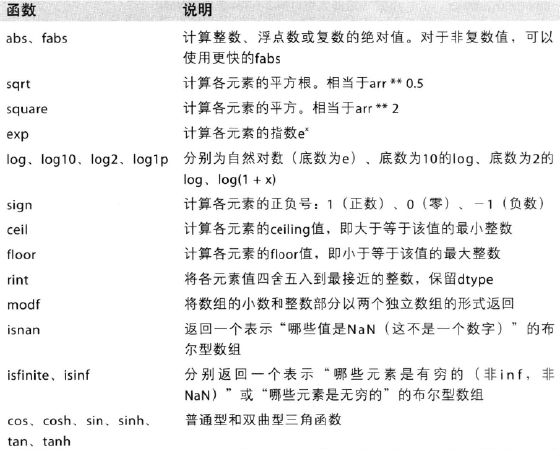

**常见的二元ufunc：**

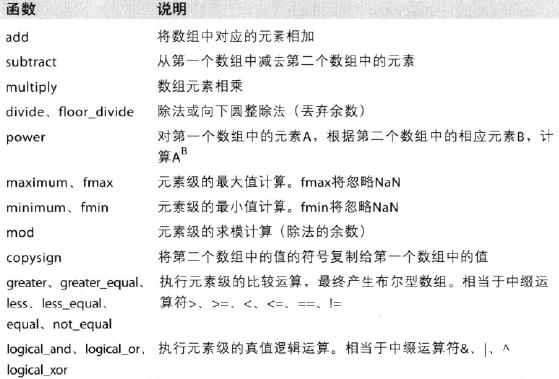

# 利用数组进行数据处理

Numpy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为**矢量化**。

meshgrid函数接受两个一维数组，并产生两个二维矩阵。每个矩阵的一行对应一维数组的一个数字，行数是一维数组的长度。

In [73]:
a=[1,2,3]; b= [2,3,4]
[x,y]=np.meshgrid(a,b)
x

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [74]:
y

array([[2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [75]:
points = np.arange(-5,5,0.01)#生成1000个间隔0.01的点
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.sqrt(xs **2 + ys **2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

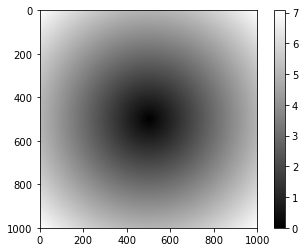

In [77]:
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()

函数值（一个二维数组）的图形化结果如上图所示。

## 数学和统计方法--sum、mean等

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean记忆标准差std等聚合计算既可以作为数组的**实例方法**调用，也可以当做顶级NumPy**函数**使用：

In [78]:
arr = np.random.randn(5,4) #正态分布的数据

In [79]:
arr.mean()

-0.30770355937974925

In [80]:
np.mean(arr)

-0.30770355937974925

In [81]:
arr.sum()

-6.1540711875949849

mean和sum这类的函数可以接受一个axis参数用以计算该轴向上的统计值：

In [82]:
arr.mean(axis = 1) #按列计算

array([-0.21527601, -0.06325962, -0.49985435, -0.61272651, -0.14740131])

In [83]:
arr.sum(axis = 0)

array([ 0.03685797, -5.03862746, -3.39599137,  2.24368966])

下表为基本数组统计方法：

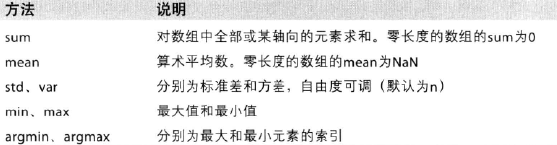

在上面的方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [84]:
arr = np.random.randn(100)
(arr>0).sum() #正值的数量

58

另外两个方法any和all对布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True：

In [85]:
bools = np.array([False,False,True,False])
bools.any() #是否存在True

True

In [86]:
bools.all() #是否都是True

False

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

## 排序--sort、sorted

跟python内置的列表类型一样，Numpy数组也可以通过**sort方法**进行排序：

In [87]:
arr = np.random.randn(8)
arr

array([-0.2259427 ,  0.16723699, -1.23278338, -1.29664522,  0.98774403,
        0.45115179, -0.50421247, -1.55963695])

In [88]:
arr.sort()
arr

array([-1.55963695, -1.29664522, -1.23278338, -0.50421247, -0.2259427 ,
        0.16723699,  0.45115179,  0.98774403])

还可以使用**sorted函数**进行排序。默认升序排列，想降序排列需要加参数reverse=True，reverse--翻转。

In [89]:
sorted(arr,reverse=True) 

[0.98774403420168855,
 0.45115178853574844,
 0.1672369892957194,
 -0.22594270169752656,
 -0.50421247256504853,
 -1.2327833782236799,
 -1.296645224782516,
 -1.5596369498032894]

多维数组可以在任何一个轴向上进行排序：

In [90]:
arr = np.random.randn(5,3)
arr

array([[-0.06139911,  1.59675389, -0.93508336],
       [-0.77463267,  1.06194348,  0.0675984 ],
       [ 0.21976136,  0.70538306,  0.91347432],
       [ 0.79871058,  0.50815934, -0.2361624 ],
       [-0.52010649, -2.2503202 ,  0.92113202]])

In [91]:
arr.sort(axis = 0) #数组排序貌似是在0 列 1 行的情况下进行的排序。
arr

array([[-0.77463267, -2.2503202 , -0.93508336],
       [-0.52010649,  0.50815934, -0.2361624 ],
       [-0.06139911,  0.70538306,  0.0675984 ],
       [ 0.21976136,  1.06194348,  0.91347432],
       [ 0.79871058,  1.59675389,  0.92113202]])

## 唯一化以及其他的集合逻辑

Numpy提供了一些针对一维naarray的基本集合运算，最常用的是**np.unique**，它用于找出数组中的唯一值并返回已排序的结果：

In [92]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

np.unique与纯Python代码对比一下：

In [93]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Python中用**集合**来返回唯一的值

另一个函数np.in1d（是yi d）用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [94]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

即values中是否存在[2,3,6]中的任一值，存在则为True。

# 用于数组的文件输入输出

## 将数组以二进制格式保存到磁盘

np.save和np.load是读写磁盘数据数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的。

In [95]:
arr = np.arange(10)
np.save('some_array',arr) #保存到磁盘，不是文本

In [96]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 存取文本文件

从文件加载文本是一个非常标准的任务，Python中的文本读写函数格式很容易将新手搞晕，所以主要还是依托于pandas的read_csv和read_table函数，在pandas文档中学习。此处学习较简单的np.loadtxt或更为专门化的np.genfromtxt将数据加载到普通的Numpy数组中。


以一个简单的逗号分隔文件(CSV)为例：

In [97]:
arr = np.loadtxt('examples/array_ex.txt',delimiter=',')

In [98]:
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

# 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式等）是任何数组库的重要组成部分，Numpy提供了一个用于矩阵乘法的dot函数：

In [99]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])

In [100]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [101]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [102]:
x.dot(y) #相当于np.dot(x,y)

array([[ 28,  64],
       [ 67, 181]])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的：

In [103]:
from numpy.linalg import inv,qr,det

X = np.random.randn(5,5)
mat = X.T.dot(X)
mat

array([[ 4.24769601, -1.07634415, -0.21073616,  1.01962282, -0.7154958 ],
       [-1.07634415,  1.16736959, -0.58784111, -0.07953939,  0.89085318],
       [-0.21073616, -0.58784111,  5.30893459,  0.27933429,  0.76851631],
       [ 1.01962282, -0.07953939,  0.27933429,  0.71803253, -1.12012757],
       [-0.7154958 ,  0.89085318,  0.76851631, -1.12012757,  4.73073427]])

In [104]:
#矩阵求逆
inv(mat)

array([[  39.59621398,   67.36590239,   20.45023122, -114.72803324,
         -37.18420083],
       [  67.36590239,  115.85758243,   35.02152117, -195.78439802,
         -63.67514449],
       [  20.45023122,   35.02152117,   10.81615166,  -59.5789912 ,
         -19.3660082 ],
       [-114.72803324, -195.78439802,  -59.5789912 ,  335.13136948,
         108.54658328],
       [ -37.18420083,  -63.67514449,  -19.3660082 ,  108.54658328,
          35.42561679]])

In [105]:
#矩阵的行列式
det(mat)

0.20459834194749119

In [106]:
#QR分解
q , r = qr(mat)
r

array([[-4.56041805,  1.40844472,  0.36098946, -1.29184706,  1.90485948],
       [ 0.        , -1.29732612,  2.64099346,  0.45478698, -2.29618735],
       [ 0.        ,  0.        , -4.70512896,  0.01703648, -2.63679097],
       [ 0.        ,  0.        ,  0.        , -1.00908428,  3.11079054],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00728365]])

**常用的numpy.linalg函数：**

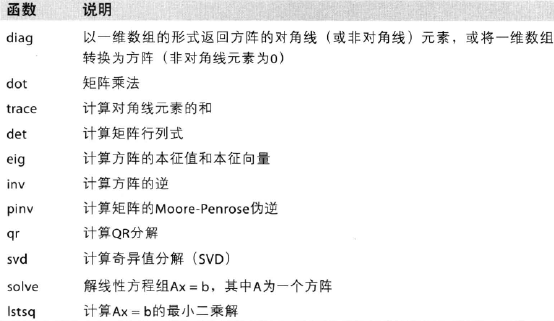

# 随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种稿率分别的样本值的函数。

normal 得到一个标准正态分布的样本数组：

In [107]:
np.random.normal(size = (4,4))

array([[ 1.96779359,  2.43546102,  0.02325797, -2.2355313 ],
       [-1.54998023, -0.35144984, -0.31997071,  0.99878805],
       [ 1.00557755, -0.21431425,  0.2816488 ,  0.60510586],
       [ 0.01085208, -0.48508855, -0.08547926,  0.16150406]])

而Python内置的random模块只能一次生成一个样本值。

**部分numpy.random函数：**

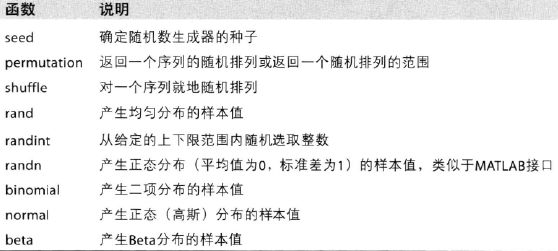

## 范例：随机漫步

我们通过模拟随机漫步来说明如何运用数组运算，一个简单的例子：从0开始，步长1和-1出现的概率相等，通过内置的random模块以纯Python的方式实现1000步的随机漫步：

In [108]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position +=step
    walk.append(position)

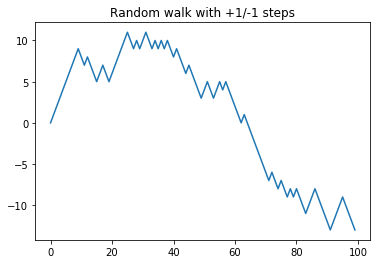

In [109]:
x=np.arange(100)
plt.plot(x,walk[:100])
plt.title('Random walk with +1/-1 steps')

上图是根据前100个随机漫步值生成的折线图。

可以看出，这其实就是随机漫步中各步的累计和，可以用一个数组运算来实现。用np.random模块一次性随机产生1000个‘掷硬币’结果（两个数任选一个），将其分别设置为1或-1，然后计算累计和：

In [110]:
nsteps =1000
draws = np.random.randint(0,2,size=nsteps) #随机产生0或1（2不包含）
steps = np.where(draws>0,1,-1)#把draws数组中大于0的数变为1，其他变为-1
walk = steps.cumsum()#累计求和

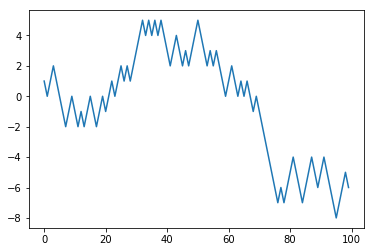

In [111]:
plt.plot(np.arange(100),walk[:100])

In [112]:
walk.min()

-18

In [113]:
walk.max()

41

如果我们想要得到随机漫步需要多久才能距离初始0点至少10步远（任一方向）：

In [114]:
(np.abs(walk)>=10).argmax()

111

argmax返回该布尔型数组最大值的索引(True就是最大值),如果最大值相等就返回第一个索引。注意：在这里argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。在本例中只要发现了第一个True，那它就是最大值了。

In [115]:
a =np.array([1,2,3,4,5,4,3,2,5])
a.argmax()

4

如上，argmax方法返回了最大值5的索引4，它会遍历所有元素找到最大的数的位置。